# Bayesian Learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
class BayesModel:
    def __init__(self, Hs):
        self.Hs = Hs
    def update(self, d):
        # update
        s = 0
        for h in self.Hs.keys():
            self.Hs[h] = self.likelihood(h, d) * self.Hs[h]
            s += self.Hs[h]
        # normalize
        for h in self.Hs.keys():
            self.Hs[h] /= s
    def likelihood(self, h, d):
        if h=='covid':
            if d=='pos': return 0.98
            if d=='neg': return 0.02
        if h=='non-covid':
            if d=='pos': return 0.03
            if d=='neg': return 0.97
    def plot(self):
        x = self.Hs.keys()
        y = self.Hs.values()
        plt.bar(x, y)
        plt.ylabel('belief')
        plt.show()

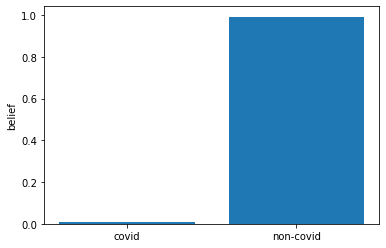

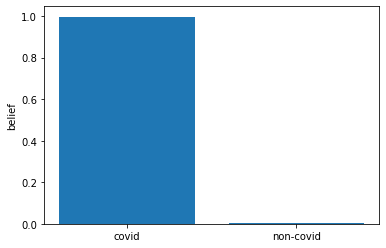

In [9]:
# hypothesis set {covid, non-covid}
Hs = {'covid': 0.008, 'non-covid': 0.992}
CovidTest = BayesModel(Hs)
CovidTest.plot()
CovidTest.update('pos')
CovidTest.update('pos')
CovidTest.update('pos')
CovidTest.plot()